In [1]:
from __future__ import print_function, division
import os, bz2, json, time, sys, csv
from datetime import timedelta, datetime

import math
import collections
import numpy as np
import pandas as pd
import matplotlib as mpl

from matplotlib import pyplot as plt
from tqdm import tqdm

from util_read import engage_read, read_vids, engage_tweets_read, merge_engage_tweets, engage_metadata, compute_period_daily

In [2]:
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"
tweets_dataset_base = "G:/MLCV dataset/engagement'16/tweets_dataset_fixTZ"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"

In [3]:
# vids from all category
vids_filter_all = read_vids(file_vids_filter_all)

merged_dataset = dict()
# engage_metadata = dict() 
for category in categories_eligible[:6]:
    engage_dataset = engage_read(engage_dataset_base, category)
    tweets_dataset = engage_tweets_read(tweets_dataset_base, category)
    
    curr_merged = merge_engage_tweets(engage_dataset, tweets_dataset)
    merged_dataset.update(curr_merged)
    
#     curr_metadata = engage_metadata(engage_dataset_base, category)
#     engage_metadata.update(curr_metadata)
print(f"Total size: {len(merged_dataset)}")

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112
Engage autos size: 25139
Tweets autos size: 25597
Merged size: 25030
Engage comedy size: 31519
Tweets comedy size: 31678
Merged size: 31456
Engage education size: 40311
Tweets education size: 41005
Merged size: 40126
Engage entertainment size: 177236
Tweets entertainment size: 179517
Merged size: 176636
Engage film size: 42439
Tweets film size: 42954
Merged size: 42295
Engage gaming size: 219709
Tweets gaming size: 221470
Merged size: 218958
Total size: 534501


In [4]:
stats = compute_period_daily(merged_dataset)

Text(0, 0.5, 'daily tweets (long-term)')

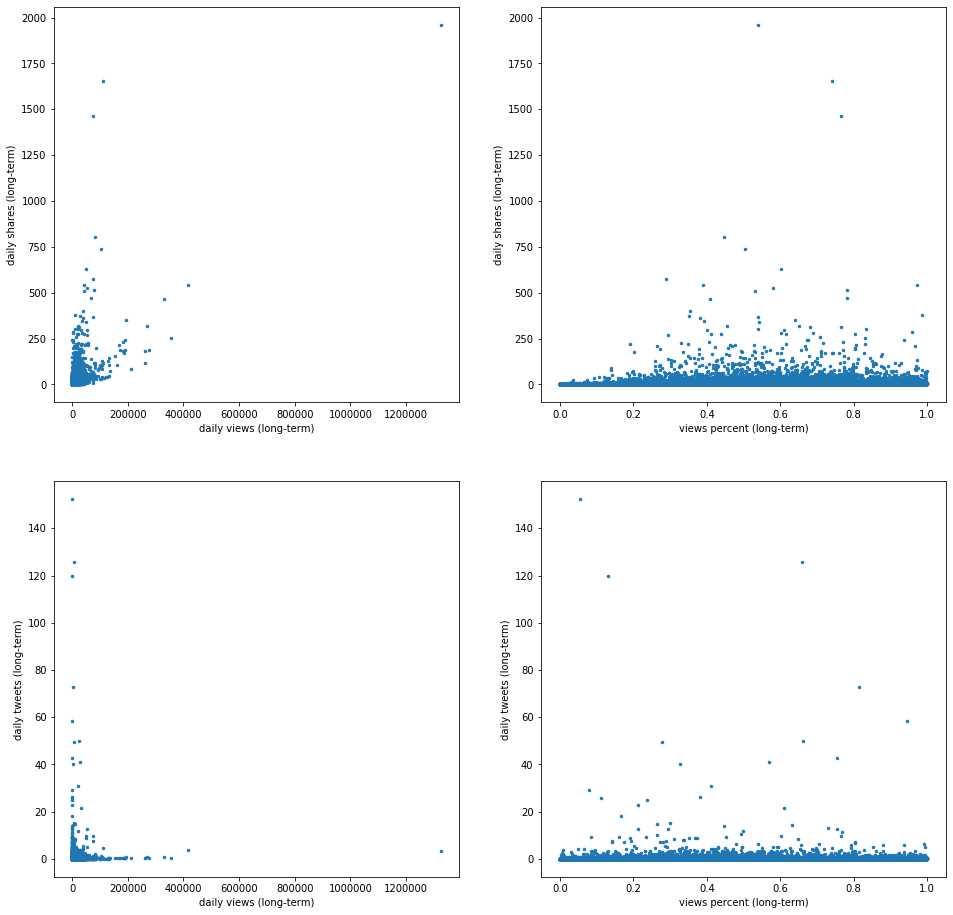

In [5]:
fig = plt.figure(figsize=(16, 16))

daily_views_lt, daily_shares_lt = stats["daily_views_lt"], stats["daily_shares_lt"]
ax = fig.add_subplot(221)
ax.scatter(daily_views_lt, daily_shares_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily shares (long-term)")

perc_views_lt, daily_shares_lt = stats["perc_views_lt"], stats["daily_shares_lt"]
ax = fig.add_subplot(222)
ax.scatter(perc_views_lt, daily_shares_lt, s = 6.0)
ax.set_xlabel("views percent (long-term)")
ax.set_ylabel("daily shares (long-term)")

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(223)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

perc_views_lt, daily_tweets_lt = stats["perc_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(224)
ax.scatter(perc_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("views percent (long-term)")
ax.set_ylabel("daily tweets (long-term)")

In [6]:
def outlier_remove_empirical(arr_att1, arr_att2):
    arr1 = np.array(arr_att1)
    arr2 = np.array(arr_att2)
    
    arr1[arr1 < 0] = np.nan
    arr1[arr1 > 200000] = np.nan
    arr2[np.isnan(arr1)] = np.nan
    
    arr2[arr2 < 0] = np.nan
    arr2[arr2 > 20] = np.nan
    arr1[np.isnan(arr2)] = np.nan
    return arr1, arr2

C:\Users\u6314203\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
C:\Users\u6314203\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'daily tweets (long-term) (removed empirically)')

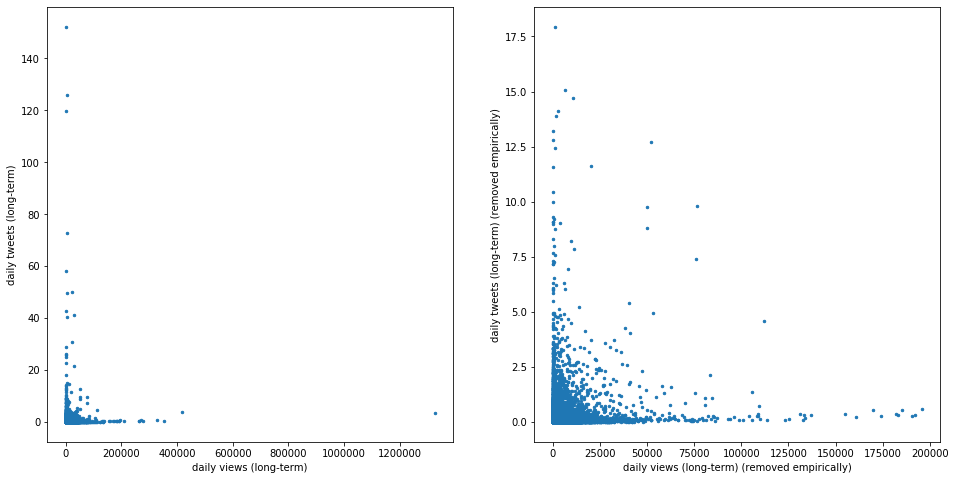

In [7]:
fig = plt.figure(figsize=(16, 8))

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(121)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

daily_views_lt, daily_tweets_lt = outlier_remove_empirical(stats["daily_views_lt"], stats["daily_tweets_lt"])
ax = fig.add_subplot(122)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term) (bottom-left)")
ax.set_ylabel("daily tweets (long-term) (bottom-left)")

In [8]:
def percentile_views(viewcounts, promotions):
    n = len(viewcounts)
    arr = [(viewcounts[i], i) for i in range(n)]
    arr.sort()
    views_percentile = [(j+1)/n for j in range(n)]
    promotions_reordered = [promotions[x[1]] for x in arr]
    return views_percentile, promotions_reordered

Text(0, 0.5, 'daily tweets (long-term)')

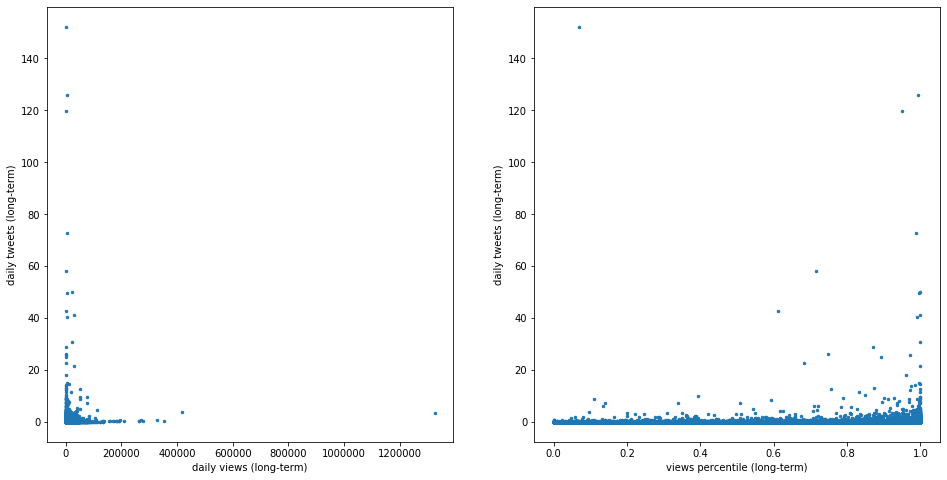

In [9]:
fig = plt.figure(figsize=(16, 8))

daily_views_lt, daily_tweets_lt = stats["daily_views_lt"], stats["daily_tweets_lt"]
ax = fig.add_subplot(121)
ax.scatter(daily_views_lt, daily_tweets_lt, s = 6.0)
ax.set_xlabel("daily views (long-term)")
ax.set_ylabel("daily tweets (long-term)")

views_percentile, daily_tweets_lt = percentile_views(stats["daily_views_lt"], stats["daily_tweets_lt"])
ax = fig.add_subplot(122)
ax.scatter(views_percentile, daily_tweets_lt, s = 6.0)
ax.set_xlabel("views percentile (long-term)")
ax.set_ylabel("daily tweets (long-term)")